In [1]:
## Imported public datasets and libraries for visualation
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

## Data load
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

## Raw data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_us = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

In [ ]:
## Extracts job skills and salary for data analysts
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

df_da_us_exploded = df_da_us.explode('job_skills')

df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [ ]:
## Finds how likely data analyst skills are going to appear on a job description and finds salary associated with the skill
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_da_us)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] /  da_job_count * 100

skill_percent = 5

df_da_skill_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


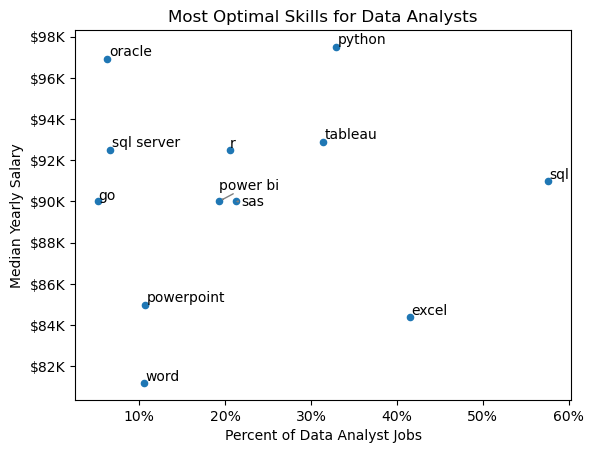

In [ ]:
## Plots the skill occurance and median salary for data analyst roles.
from adjustText import adjust_text

df_da_skill_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts= []
for i, txt in enumerate(df_da_skill_high_demand.index):
    texts.append(plt.text(df_da_skill_high_demand['skill_percent'].iloc[i], df_da_skill_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout   
plt.show()